In [3]:
import pandas as pd
from pandas import DataFrame
data=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\Data Science\\ML\\Excel Data\\houseprice.csv")




In [4]:
cols=list(data.columns)

In [5]:
drop_cols=[i for i in cols if data[i].dtype=='object']

In [6]:
data.drop(drop_cols,axis=1,inplace=True)

In [8]:
df=[]
for i in range(len(data)):
    if data['SalePrice'][i]<100000:
        df.append(0)
    elif 100000<data['SalePrice'][i]<=500000:
        df.append(1)
    else:
        df.append(2)
data['SalePrice']=df


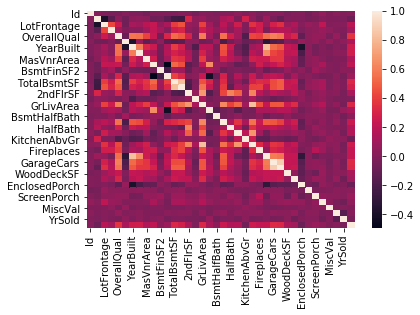

In [48]:
import seaborn as sns
hmap=data.corr()
sns.heatmap(hmap)

In [41]:
X=data.drop(['SalePrice','Id','LotFrontage','GarageYrBlt','MasVnrArea'],axis=1)
y=data['SalePrice']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

##################################################

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

###############################################

from sklearn.decomposition import PCA
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  



In [45]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9417808219178082